In [2]:
import os
thisFilePath=os.path.abspath('.')
os.chdir(thisFilePath)
os.getcwd()

'D:\\my python file\\mypython'

## 导入数据

In [3]:
import pandas as pd
df1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
df1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [4]:
import pandas as pd
df2=pd.read_csv('item-2018-06-01-2018-07-05.csv')
df2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 数据概览

In [5]:
df1.shape

(571552, 5)

In [6]:
df2.shape

(1048575, 10)

In [7]:
df1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [8]:
df2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


## 数据清洗

In [9]:
df1.dtypes #查看一下各个列的数据类型

SHOP_DATETIME      object
STORE_CODE         object
POS_NO              int64
BASK_CODE           int64
BASK_SPEND        float64
dtype: object

In [10]:
df2.dtypes

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [11]:
#从上面发现列名不符合Python的命名规范，对列名进行一下重命名，采用下划线命名法：
df1.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df1.dtypes 

SHOP_DATETIME_     object
STORE_CODE         object
POS_NO_             int64
BASK_CODE___        int64
BASK_SPEND        float64
dtype: object

In [12]:
df2.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df2.dtypes 

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE_           int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [13]:
#下单日期应为datetime类型，需要进行处理。
df1["SHOP_DATETIME_"] = pd.to_datetime(df1["SHOP_DATETIME_"]) 
df2["SDATE"].sample(5)

761910    2018/6/18
291372     2018/6/6
478896     2018/6/9
52592      2018/6/1
68102      2018/6/1
Name: SDATE, dtype: object

In [14]:
df2["SDATE"] = pd.to_datetime(df2["SDATE"]) 
df2["SDATE"].sample(5)

137978   2018-06-05
392307   2018-06-10
852117   2018-06-17
308562   2018-06-06
853394   2018-06-17
Name: SDATE, dtype: datetime64[ns]

In [15]:
#缺失值处理
df1.isnull().sum(axis=0)

SHOP_DATETIME_    0
STORE_CODE        0
POS_NO_           0
BASK_CODE___      0
BASK_SPEND        0
dtype: int64

In [16]:
df2.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE_         0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [17]:
#简单查看一下是否有异常值
df1.describe()

,POS_NO_,BASK_CODE___,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [18]:
#看一下是否有重复值
df1.duplicated().sum()

0

In [19]:
df2.duplicated().sum()   #无需处理

128777

## 数据分析

#### 门店信息汇总分析

In [20]:
store_number=df1.drop_duplicates(subset=['STORE_CODE'])
store_number #查看共涉及到商店的数量

,SHOP_DATETIME_,STORE_CODE,POS_NO_,BASK_CODE___,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
12,2018-06-01,A019,1,192101,15.37
13,2018-06-01,D008,1,197147,10.70
16,2018-06-01,D009,3,144146,3.60
24,2018-06-02,A001,6,229732,7.50
35,2018-06-01,D002,4,143637,132.80
62,2018-06-01,D003,2,53190,30.90
64,2018-06-01,D004,1,173594,21.00
69,2018-06-01,D005,2,204925,71.40
73,2018-06-01,D006,3,148666,26.99


In [21]:
store_number.shape   #24个商店

(24, 5)

In [22]:
store_number=df2.drop_duplicates(subset=['STORE_CODE'])
store_number

,SDATE,STORE_CODE,POSID,BASK_CODE_,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.30
288,2018-06-01,A019,2,24592,194906,0.056,1.88,33.6,n,0.00
366,2018-06-01,D008,4,17849,77420,1.000,92.80,112.0,p,-19.20
500,2018-06-01,D009,3,144271,83512,2.000,4.40,2.2,n,0.00
808,2018-06-02,A001,6,229611,15930,1.000,1.80,1.8,n,0.00
1006,2018-06-01,D002,4,143702,189589,1.000,25.50,29.5,p,-4.00
1800,2018-06-01,D003,2,53026,194690,1.074,3.20,3.9,p,-0.99
1843,2018-06-01,D004,2,15875,91677,1.000,4.90,4.9,n,0.00
2009,2018-06-01,D005,2,204976,221923,1.000,14.90,20.5,p,-5.60
2112,2018-06-01,D006,3,148613,219924,1.000,8.80,8.8,n,0.00


In [23]:
store_number.shape #24个商店

(24, 10)

In [24]:
import matplotlib.pyplot as plt
df1_spend=df1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
df1_spend.set_index('STORE_CODE',inplace=True)
df1_spend.plot(kind='barh')   #df1各商店的消费额，可以看出A001店消费额最高，D003消费额最低

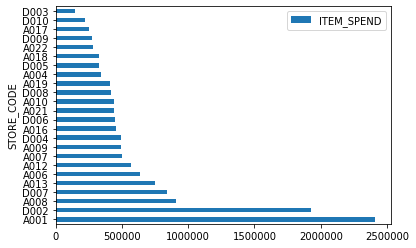

In [25]:
df2_spend=df2.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#商店按消费额大小排序
df2_spend.set_index('STORE_CODE',inplace=True)
df2_spend.plot(kind='barh')

In [26]:
df1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False).head(10)
#df1表格的商店按消费额大小排序

,STORE_CODE,BASK_SPEND
0,A001,3.435303e+06
15,D002,3.129447e+06
20,D007,1.361607e+06
4,A008,1.311171e+06
8,A013,1.117126e+06
2,A006,9.383050e+05
7,A012,8.469747e+05
17,D004,8.078603e+05
5,A009,7.977389e+05
19,D006,7.935042e+05


In [29]:
df2.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False).head(10)
#df1表格的商店按消费额大小排序

,STORE_CODE,ITEM_SPEND
0,A001,2.406273e+06
15,D002,1.926961e+06
4,A008,9.098822e+05
20,D007,8.419326e+05
8,A013,7.512220e+05
2,A006,6.355488e+05
7,A012,5.689114e+05
3,A007,4.984390e+05
5,A009,4.932237e+05
17,D004,4.908162e+05


In [31]:
df1.loc[:,'STORE_CODE'].value_counts()
#df1表格商店按结账次数大小排序 A001结账次数最大

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: STORE_CODE, dtype: int64

In [41]:
df1.loc[:,'STORE_CODE'].value_counts()
#df1表格商店按结账次数大小排序

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: STORE_CODE, dtype: int64

In [42]:
df1.loc[:,'POS_NO_'].value_counts()
#df1表格商店按POS机次数大小排序

2     176108
1     160802
3     101181
6      39383
4      31148
8      21326
9      18203
5      12316
13      5616
10      2649
20      1386
7       1181
19       253
Name: POS_NO_, dtype: int64

In [45]:
df2.loc[:,'POSID'].value_counts()
#df2表格商店按POS机次数大小排序

2     327303
1     285989
3     185490
6      72481
4      57320
8      37990
9      32697
5      26643
13     14501
7       4605
10      2117
20      1020
19       419
Name: POSID, dtype: int64

In [58]:
#按照日期查看销售额总和
df1_sum = df1.groupby('SHOP_DATETIME_')['BASK_SPEND'].sum()
df1_sum

SHOP_DATETIME_
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

In [55]:
df2_sum = df2.groupby('SDATE')['ITEM_SPEND'].sum()
df2_sum

SDATE
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     149187.06
2018-06-20     282055.67
2018-06-22     157297.17
2018-06-24     207999.64
2018-06-25     120581.00
Name: ITEM_SPEND, dtype: float64

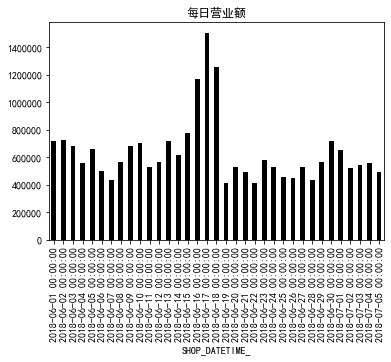

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
df1_sum.plot(kind='bar',color="black",title="每日营业额")

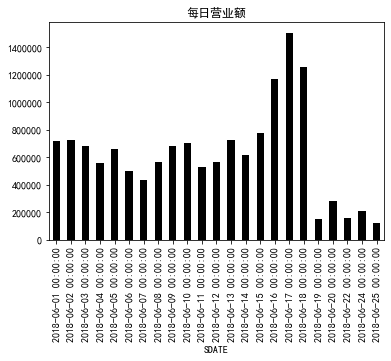

In [66]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
df2_sum.plot(kind='bar',color="black",title="每日营业额")